In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
hr_data=pd.read_csv('HR Data.csv')
hr_data


,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Yes,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,STAFF-1905,1905,Male,Research Scientist,...,4,2,80,1,5,3,5,2,3,0
1466,Yes,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-1868,1868,Male,Research Scientist,...,4,2,80,0,1,2,1,0,1,0
1467,Yes,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,STAFF-1667,1667,Male,Sales Executive,...,4,1,80,0,13,4,11,9,6,7
1468,Yes,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,STAFF-1878,1878,Male,Research Scientist,...,4,1,80,0,1,3,1,0,0,0


In [2]:
hr_data.columns


Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label',
       'Department', 'Education Field', 'emp no', 'Employee Number', 'Gender',
       'Job Role', 'Marital Status', 'Over Time', 'Over18',
       'Training Times Last Year', 'Age', 'CF_current Employee', 'Daily Rate',
       'Distance From Home', 'Education', 'Employee Count',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')

In [5]:
hr_data['Department'].value_counts()

Department
R&D      961
Sales    446
HR        63
Name: count, dtype: int64

In [8]:
hr_data.count()

Attrition                     1470
Business Travel               1470
CF_age band                   1470
CF_attrition label            1470
Department                    1470
Education Field               1470
emp no                        1470
Employee Number               1470
Gender                        1470
Job Role                      1470
Marital Status                1470
Over Time                     1470
Over18                        1470
Training Times Last Year      1470
Age                           1470
CF_current Employee           1470
Daily Rate                    1470
Distance From Home            1470
Education                     1470
Employee Count                1470
Environment Satisfaction      1470
Hourly Rate                   1470
Job Involvement               1470
Job Level                     1470
Job Satisfaction              1470
Monthly Income                1470
Monthly Rate                  1470
Num Companies Worked          1470
Percent Salary Hike 

In [10]:
hr_data.nunique()

Attrition                        2
Business Travel                  3
CF_age band                      5
CF_attrition label               2
Department                       3
Education Field                  6
emp no                        1470
Employee Number               1470
Gender                           2
Job Role                         9
Marital Status                   3
Over Time                        2
Over18                           1
Training Times Last Year         7
Age                             43
CF_current Employee              2
Daily Rate                     886
Distance From Home              29
Education                        5
Employee Count                   1
Environment Satisfaction         4
Hourly Rate                     71
Job Involvement                  4
Job Level                        5
Job Satisfaction                 4
Monthly Income                1349
Monthly Rate                  1427
Num Companies Worked            10
Percent Salary Hike 

In [10]:

hr_data.duplicated().sum()

0

Employee Count: 1470
Attrition Count: 237
Attrition Rate: 16.12 %
Active Employees: 1233
Average Age: 37.0


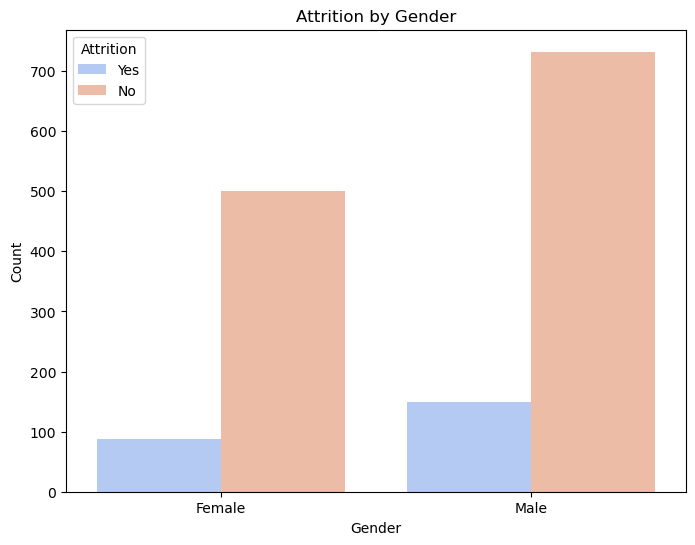

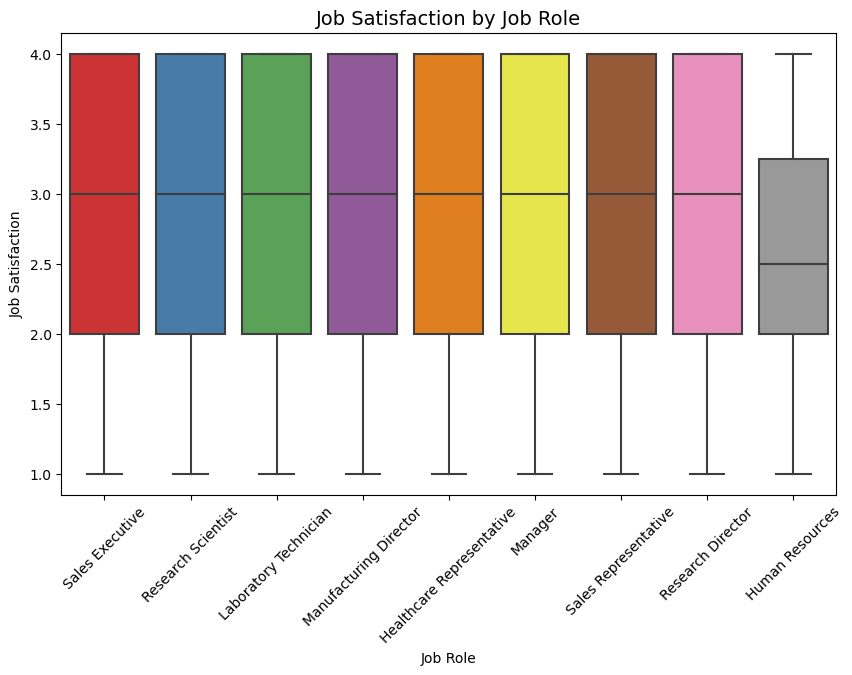

In [11]:
# 1. **Employee Count**
employee_count = hr_data['Employee Count'].count()

# 2. **Attrition Count**
attrition_count = hr_data[hr_data['Attrition'] == 'Yes'].shape[0]

# 3. **Attrition Rate**
attrition_rate = (attrition_count / employee_count) * 100

# 4. **Active Employees**
active_employees = hr_data[hr_data['Attrition'] == 'No'].shape[0]

# 5. **Average Age**
average_age = hr_data['Age'].mean()

# KPIs
print("Employee Count:", employee_count)
print("Attrition Count:", attrition_count)
print("Attrition Rate:", round(attrition_rate, 2), "%")
print("Active Employees:", active_employees)
print("Average Age:", round(average_age, 0))
# 3. **Attrition by Gender**
plt.figure(figsize=(8, 6))
sns.countplot(data=hr_data, x='Gender', hue='Attrition', palette='coolwarm')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# 4. **Job Satisfaction Rating (Job Role vs Job Satisfaction)** (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Job Role", y="Job Satisfaction", data=hr_data, palette="Set1")
plt.title("Job Satisfaction by Job Role", fontsize=14)
plt.xlabel("Job Role")
plt.ylabel("Job Satisfaction")
plt.xticks(rotation=45)
plt.show()

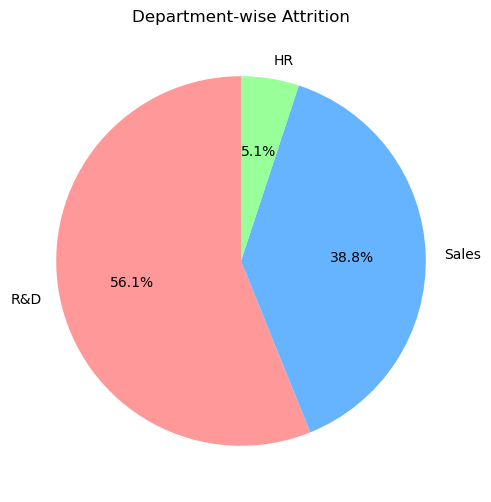

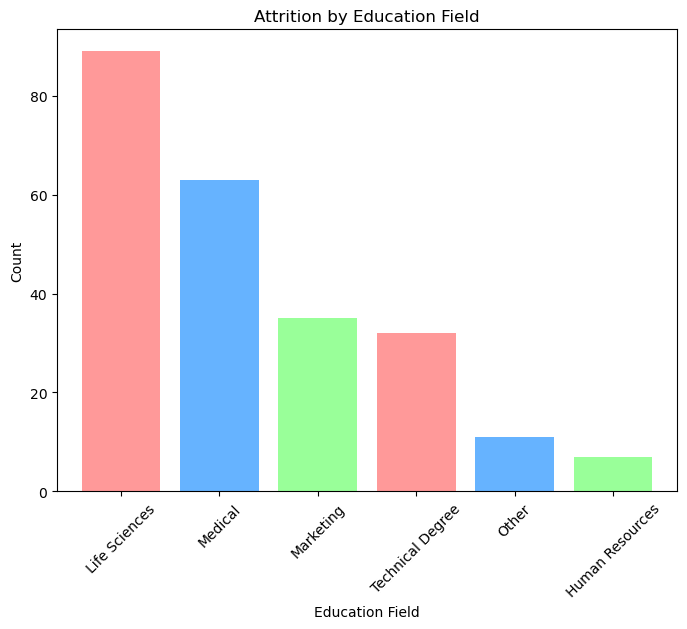

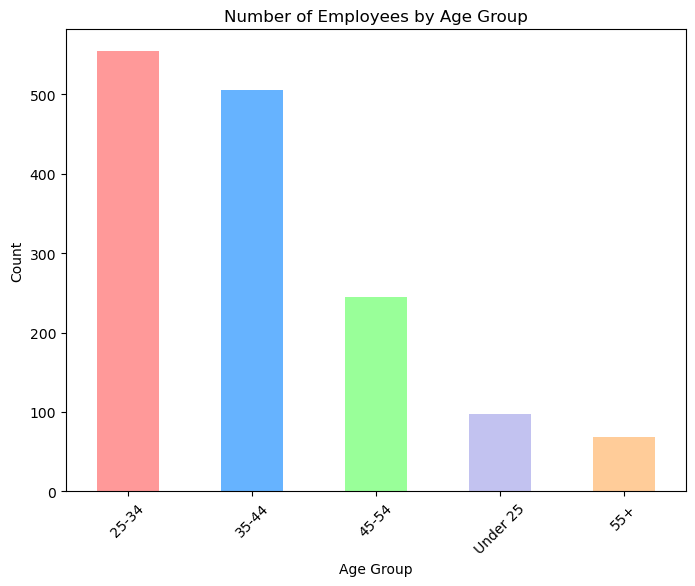

In [20]:

# 5. **Department-wise Attrition (Pie Chart)**
plt.figure(figsize=(8, 6))
department_attrition = hr_data[hr_data["Attrition"] == "Yes"]['Department'].value_counts()
department_attrition.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Department-wise Attrition')
plt.ylabel('')  # Remove y-label for clarity
plt.show()

# 6. **Education Field-wise Attrition (Bar Chart)**
plt.figure(figsize=(8, 6))
education_field_attrition = hr_data[hr_data["Attrition"] == "Yes"]['Education Field'].value_counts()
education_field_attrition.plot(kind='bar', color=['#ff9999','#66b3ff','#99ff99'], width=0.8)
plt.title('Attrition by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 7. **Employees by Age Group (Bar Chart)**
hr_data["CF_age band"] = pd.cut(
    hr_data["Age"],
    bins=[0, 24, 34, 44, 54, float("inf")],
    labels=["Under 25", "25-34", "35-44", "45-54", "55+"],
)
plt.figure(figsize=(8, 6))
employees_by_age_group = hr_data['CF_age band'].value_counts()
employees_by_age_group.plot(kind='bar', color=['#ff9999','#66b3ff','#99ff99','#c2c2f0','#ffcc99'])
plt.title('Number of Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [17]:
hr_data.columns

Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label',
       'Department', 'Education Field', 'emp no', 'Employee Number', 'Gender',
       'Job Role', 'Marital Status', 'Over Time', 'Over18',
       'Training Times Last Year', 'Age', 'CF_current Employee', 'Daily Rate',
       'Distance From Home', 'Education', 'Employee Count',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')

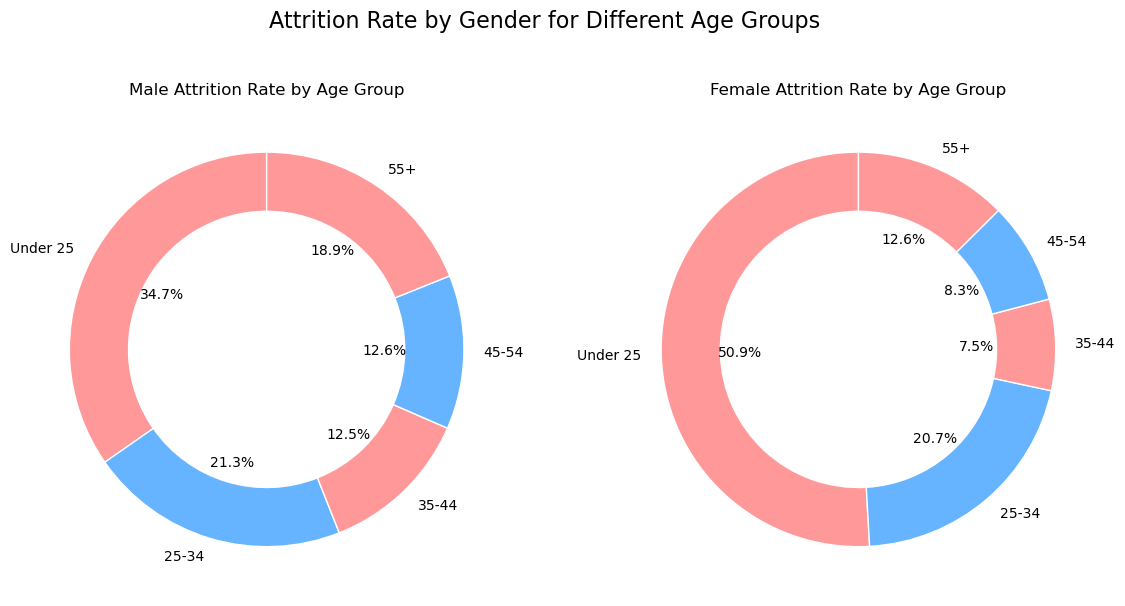

In [96]:
# Calculate Attrition Rate by Gender for Different Age Groups
# Group by gender and age group, count attrition (Yes) and total employees
attrition_rate_by_gender_age_group = hr_data.groupby(['Gender', 'CF_age band'])['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Calculate the attrition rate (percentage of Yes for each gender-age group combination)
attrition_rate_by_gender_age_group['Attrition_rate'] = attrition_rate_by_gender_age_group['Yes'] * 100

# Extract the attrition rate data for male and female
attrition_rate_male = attrition_rate_by_gender_age_group.loc['Male', 'Attrition_rate']
attrition_rate_female = attrition_rate_by_gender_age_group.loc['Female', 'Attrition_rate']

# Plotting Donut Charts for Male and Female Attrition Rate by Age Groups
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Male Attrition Rate Donut Chart
ax[0].pie(attrition_rate_male, labels=attrition_rate_male.index, autopct='%1.1f%%', startangle=90,
          wedgeprops={'width': 0.3, 'edgecolor': 'w'}, colors=['#ff9999', '#66b3ff'])
ax[0].set_title("Male Attrition Rate by Age Group")

# Female Attrition Rate Donut Chart
ax[1].pie(attrition_rate_female, labels=attrition_rate_female.index, autopct='%1.1f%%', startangle=90,
          wedgeprops={'width': 0.3, 'edgecolor': 'w'}, colors=['#ff9999', '#66b3ff'])
ax[1].set_title("Female Attrition Rate by Age Group")

# Add a main title
fig.suptitle("Attrition Rate by Gender for Different Age Groups", fontsize=16)

# Display the plot
plt.show()


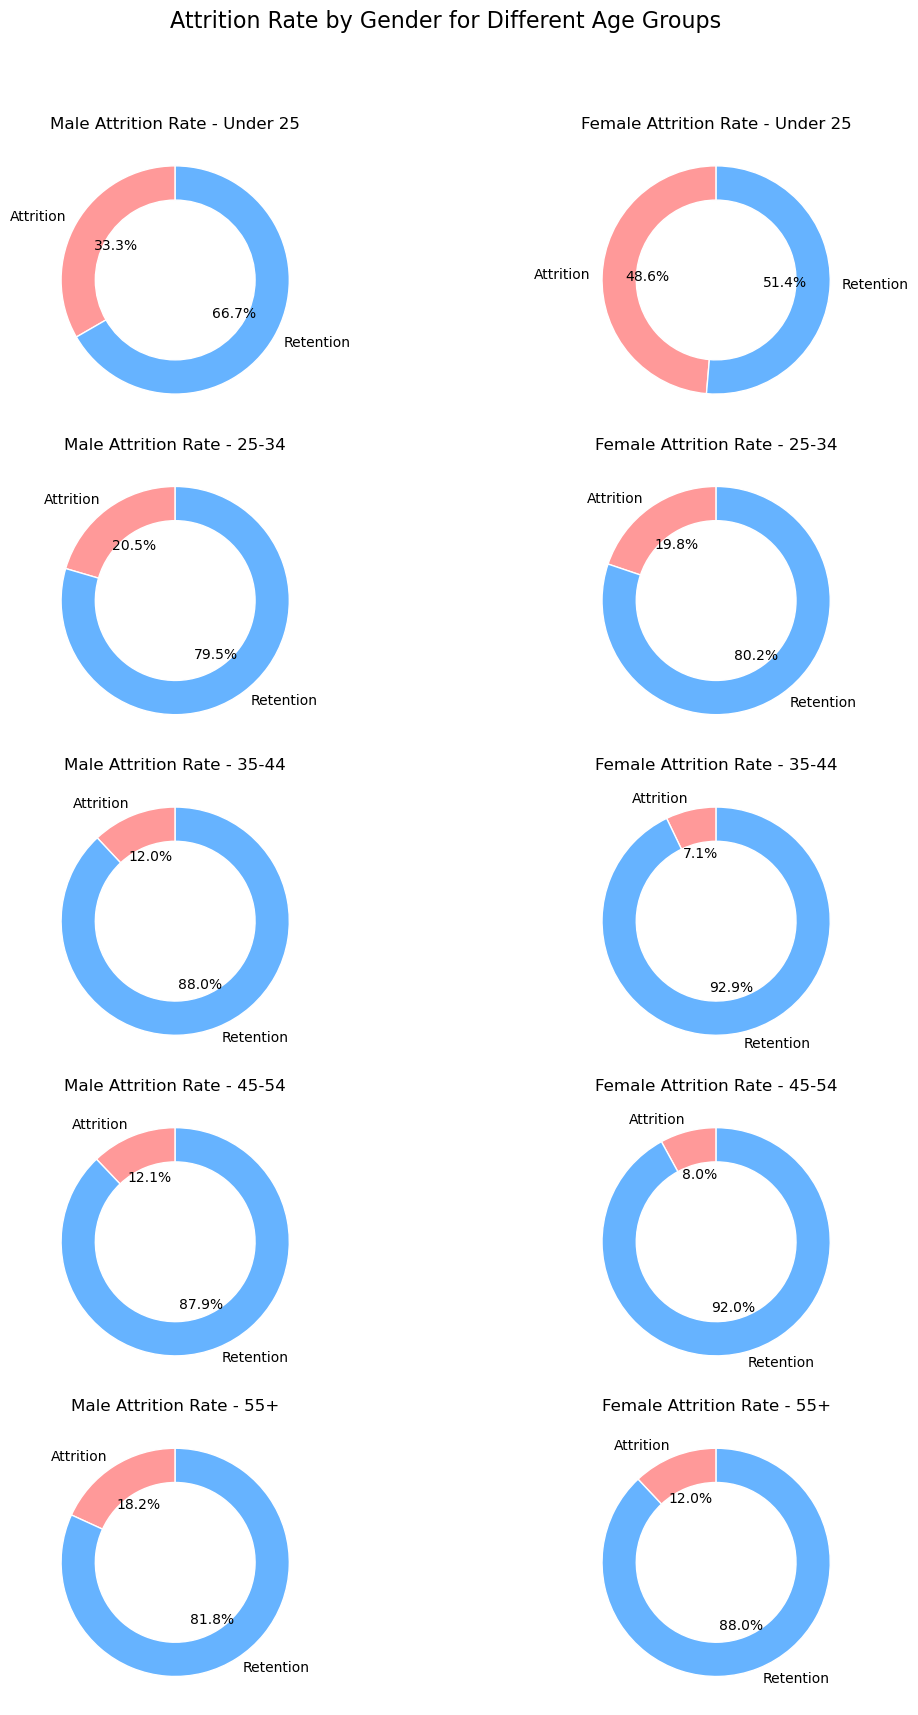

In [98]:
# Calculate Attrition Rate by Gender for Different Age Groups
# Group by gender and age group, count attrition (Yes) and total employees
attrition_rate_by_gender_age_group = hr_data.groupby(['Gender', 'CF_age band'])['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Calculate the attrition rate (percentage of Yes for each gender-age group combination)
attrition_rate_by_gender_age_group['Attrition_rate'] = attrition_rate_by_gender_age_group['Yes'] * 100

# Prepare to plot
fig, axes = plt.subplots(5, 2, figsize=(12, 18))  # 5 rows, 2 columns for Male and Female

# List of age group labels for easier iteration
age_groups = ["Under 25", "25-34", "35-44", "45-54", "55+"]

# Loop through the age groups and plot male/female attrition rates
for i, age_group in enumerate(age_groups):
    male_attrition_rate = attrition_rate_by_gender_age_group.loc[("Male", age_group), "Attrition_rate"]
    female_attrition_rate = attrition_rate_by_gender_age_group.loc[("Female", age_group), "Attrition_rate"]
    
    # Male Donut Chart (Left side of each row)
    axes[i, 0].pie([male_attrition_rate, 100 - male_attrition_rate], labels=["Attrition", "Retention"], autopct='%1.1f%%', startangle=90,
                   wedgeprops={'width': 0.3, 'edgecolor': 'w'}, colors=['#ff9999', '#66b3ff'])
    axes[i, 0].set_title(f"Male Attrition Rate - {age_group}")
    
    # Female Donut Chart (Right side of each row)
    axes[i, 1].pie([female_attrition_rate, 100 - female_attrition_rate], labels=["Attrition", "Retention"], autopct='%1.1f%%', startangle=90,
                   wedgeprops={'width': 0.3, 'edgecolor': 'w'}, colors=['#ff9999', '#66b3ff'])
    axes[i, 1].set_title(f"Female Attrition Rate - {age_group}")

# Add a main title for the entire figure
fig.suptitle("Attrition Rate by Gender for Different Age Groups", fontsize=16)
# Adjust layout to make space for the titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

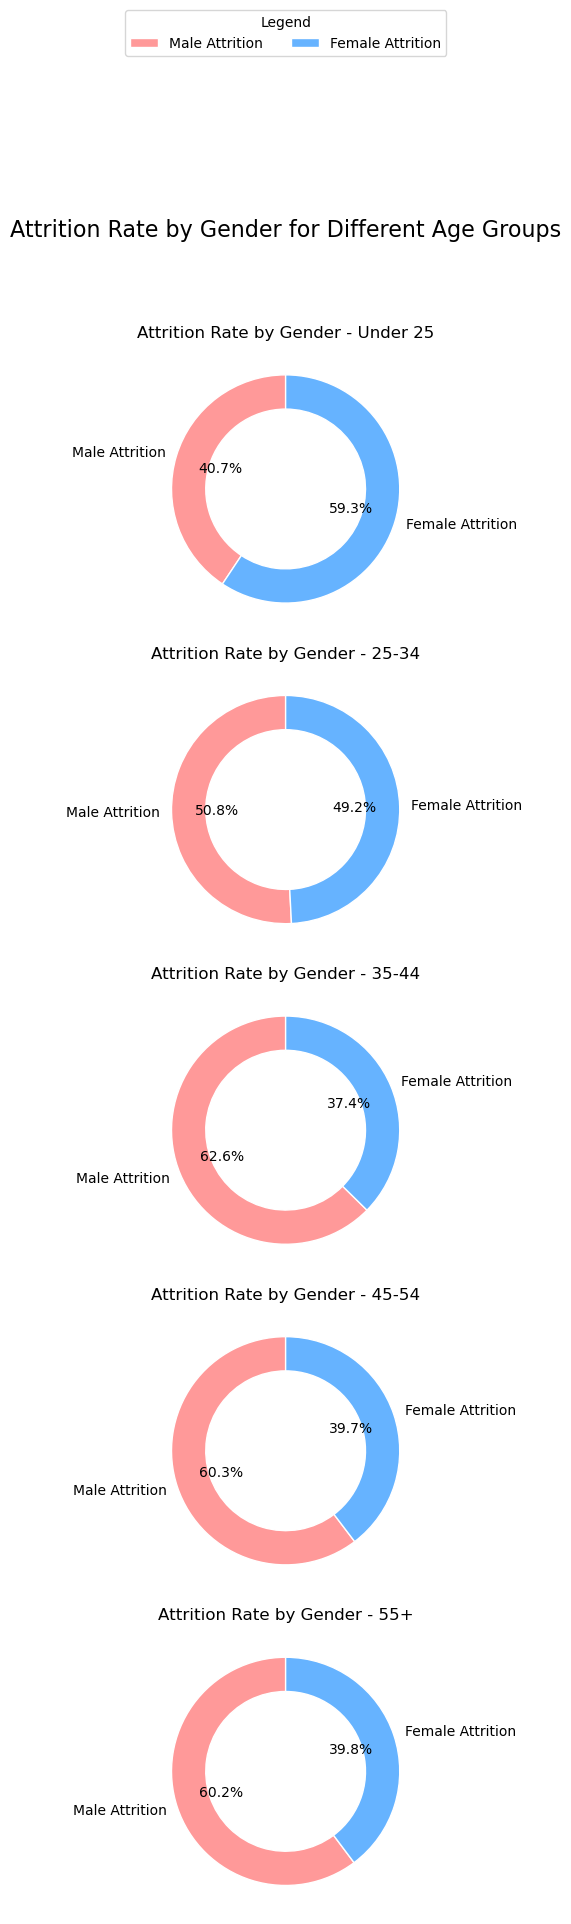

In [99]:
# Calculate Attrition Rate by Gender for Different Age Groups
# Group by gender and age group, count attrition (Yes) and total employees
attrition_rate_by_gender_age_group = hr_data.groupby(['Gender', 'CF_age band'])['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Calculate the attrition rate (percentage of Yes for each gender-age group combination)
attrition_rate_by_gender_age_group['Attrition_rate'] = attrition_rate_by_gender_age_group['Yes'] * 100

# Prepare to plot
fig, axes = plt.subplots(5, 1, figsize=(10, 18))  # 5 rows, 1 column for each age group

# List of age group labels for easier iteration
age_groups = ["Under 25", "25-34", "35-44", "45-54", "55+"]

# Loop through the age groups and plot male/female attrition rates in the same chart
for i, age_group in enumerate(age_groups):
    # Extract the attrition rates for male and female
    male_attrition_rate = attrition_rate_by_gender_age_group.loc[("Male", age_group), "Attrition_rate"]
    female_attrition_rate = attrition_rate_by_gender_age_group.loc[("Female", age_group), "Attrition_rate"]
    
    # Combine the attrition rate for male and female for plotting
    data = [male_attrition_rate, female_attrition_rate]
    
    # Plot the combined donut chart for Male and Female in the same subplot
    wedges, texts, autotexts = axes[i].pie(data, labels=["Male Attrition", "Female Attrition"],
                                          autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3, 'edgecolor': 'w'},
                                          colors=['#ff9999', '#66b3ff'])
    
    # Set title for each subplot
    axes[i].set_title(f"Attrition Rate by Gender - {age_group}")

# Add a single shared legend for all subplots at the top
fig.legend(wedges, ['Male Attrition', 'Female Attrition'], title="Legend", loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=2)

# Add a main title for the entire figure
fig.suptitle("Attrition Rate by Gender for Different Age Groups", fontsize=16)

# Adjust layout to make space for the titles and legend
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()